In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


<Axes: ylabel='count'>

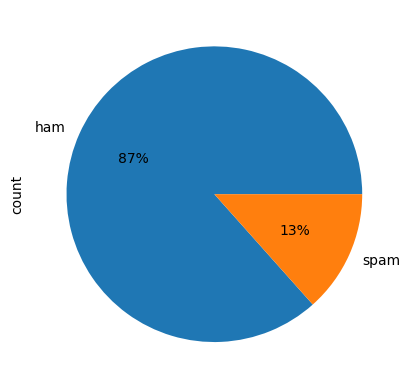

In [5]:
spam_det = pd.read_csv('../datasets/spam.csv')
spam_det.groupby('Category').describe()

spam_det['Category'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [3]:
# Spam if it is one and not spam if it is a zero
spam_det['spam'] = spam_det['Category'].apply(lambda x: 1 if x == 'spam' else 0)


In [4]:
# Create a training and testing split 
x_train, x_test, y_train, y_test = train_test_split(spam_det.Message, spam_det.spam, test_size=0.25)
# Only messages 
x_train.describe()

count                       4179
unique                      3922
top       Sorry, I'll call later
freq                          21
Name: Message, dtype: object

In [5]:
# Word count and store data as a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
# Training the Random Forest model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_count, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Test case: Not spam trial
email_ham = ["test case for my model "]
email_ham_count = cv.transform(email_ham)
prediction_ham = rf_model.predict(email_ham_count)
if prediction_ham == 0:
    print("It is not spam")
else:
    print("It is a spam")

It is not spam


In [8]:
# Test case: Spam trial 
email_spam = ["reward money click"]
email_spam_count = cv.transform(email_spam)
prediction_spam = rf_model.predict(email_spam_count)
if prediction_spam == 1:
    print("It is a spam")
else:
    print("It isn't a spam")


It isn't a spam


In [9]:
# Testing the model on the test set
x_test_count = cv.transform(x_test)
y_pred_rf = rf_model.predict(x_test_count)

In [10]:

# Calculating metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

Random Forest Metrics:
Accuracy: 0.9712849964106246
Precision: 0.9869281045751634
Recall: 0.798941798941799
F1 Score: 0.8830409356725146
